# Exploring Mental Health raw data EDA 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

## Data Overview

The target is Depression which is a binary variable.

In [2]:
train_path = "../data/raw/train.csv"
test_path = "../data/raw/test.csv"

train = pd.read_csv(train_path, index_col = "id")
test = pd.read_csv(test_path, index_col = "id")

print(f"Train shape: {train.shape}, Test shape: {test.shape}")
train.head()

Train shape: (140700, 19), Test shape: (93800, 18)


,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
id,,,,,,,,,,,,,,,,,,,
0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140700 entries, 0 to 140699
Data columns (total 19 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Name                                   140700 non-null  object 
 1   Gender                                 140700 non-null  object 
 2   Age                                    140700 non-null  float64
 3   City                                   140700 non-null  object 
 4   Working Professional or Student        140700 non-null  object 
 5   Profession                             104070 non-null  object 
 6   Academic Pressure                      27897 non-null   float64
 7   Work Pressure                          112782 non-null  float64
 8   CGPA                                   27898 non-null   float64
 9   Study Satisfaction                     27897 non-null   float64
 10  Job Satisfaction                       112790 non-null  float

## Descriptive Statistics

In [4]:
train.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


## Missing Values 

In [5]:
missing_values = train.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

Missing Values:
 Profession             36630
Academic Pressure     112803
Work Pressure          27918
CGPA                  112802
Study Satisfaction    112803
Job Satisfaction       27910
Dietary Habits             4
Degree                     2
Financial Stress           4
dtype: int64


<Axes: ylabel='id'>

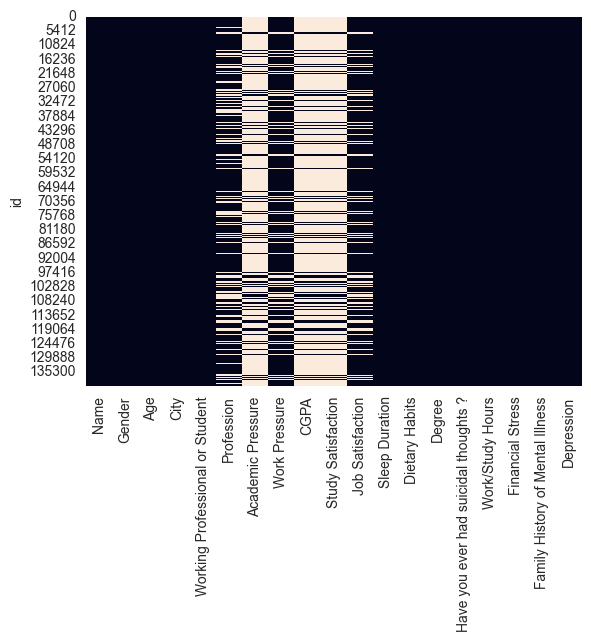

In [6]:
sns.heatmap(train.isnull(), cbar=False)

### Insights:
- **Students**: Missing **Work Pressure**, **Job Satisfaction**, and **Profession** (expected)  
- **Professionals**: Missing **Academic Pressure**, **CGPA**, and **Study Satisfaction**  
- Minimal missing data in **Dietary Habits**  and **Financial Stress**  - will be imputed  

During preprocessing, 2 features **Pressure** and **Satisfaction** will be created to merge **Students** and **Professionals** separated features

## Features Analysis

Text(0.5, 1.0, 'Financial Stress Distribution by Depression Status')

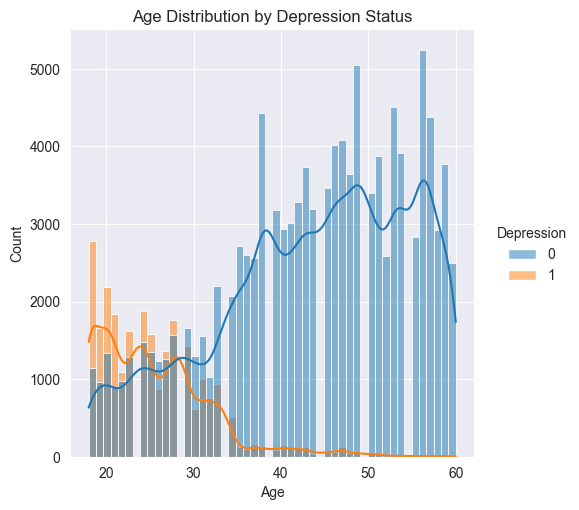

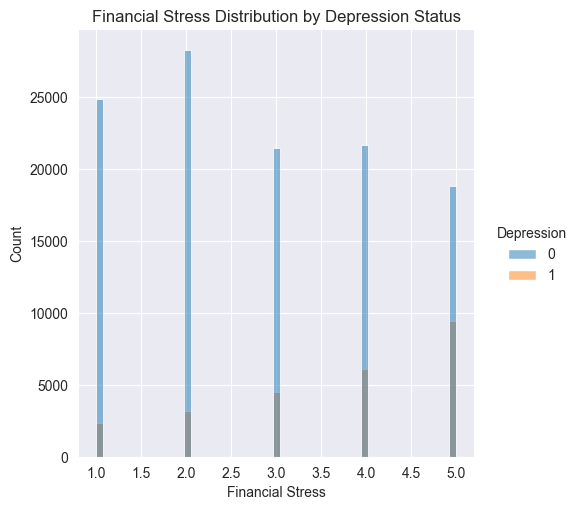

In [7]:
sns.displot(train, x="Age", kde=True, hue="Depression")
plt.title("Age Distribution by Depression Status")
sns.displot(train, x="Financial Stress", hue="Depression")
plt.title("Financial Stress Distribution by Depression Status")

### Key Findings:
- **18-35 year olds** show higher depression prevalence  
- **Financial stress** strongly correlates with depression (see next section)  

### Feature related to student

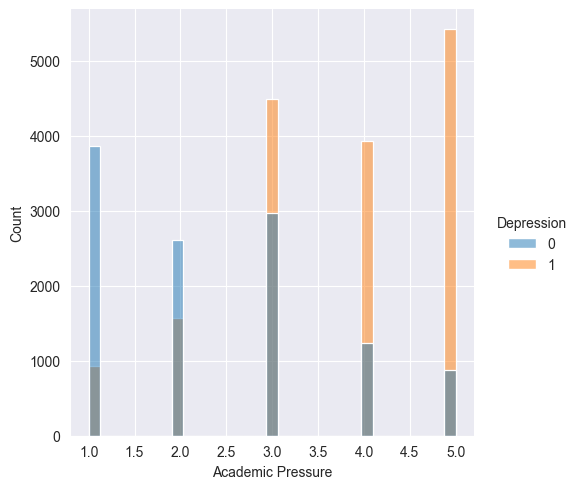

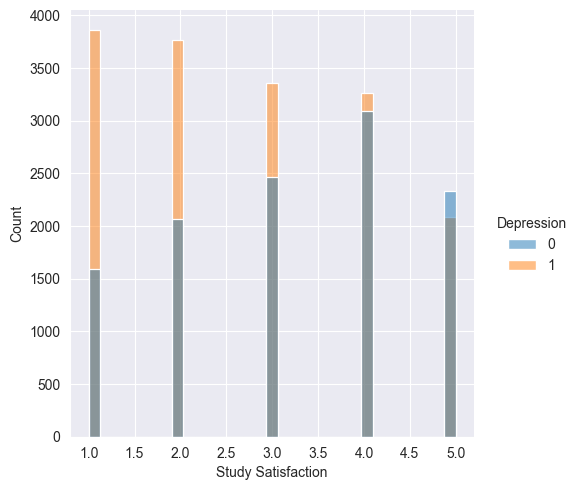

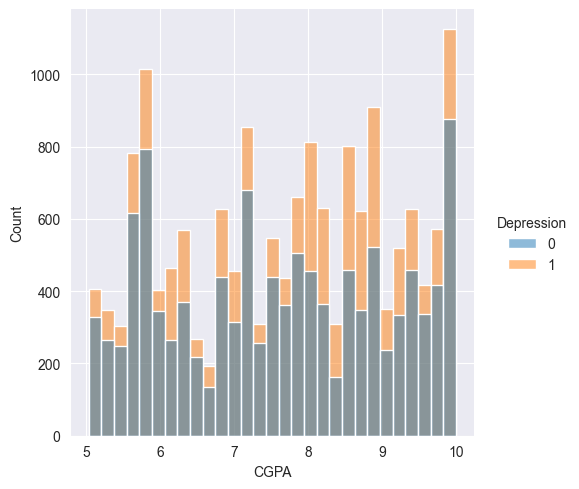

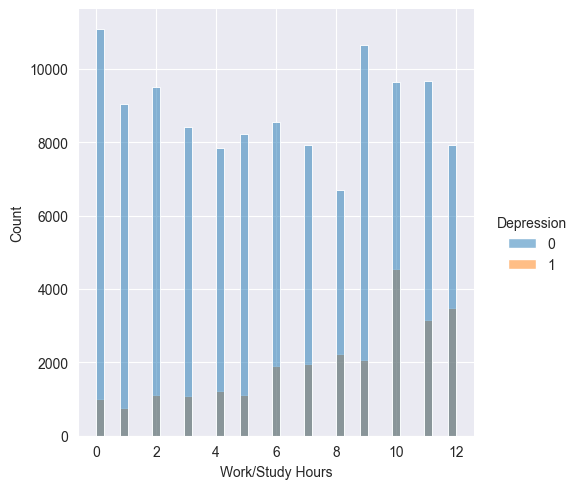

In [8]:
sns.displot(train, x="Academic Pressure", hue="Depression")
sns.displot(train, x="Study Satisfaction", hue="Depression")
sns.displot(train, x="CGPA", hue="Depression")
sns.displot(train, x="Work/Study Hours", hue="Depression")

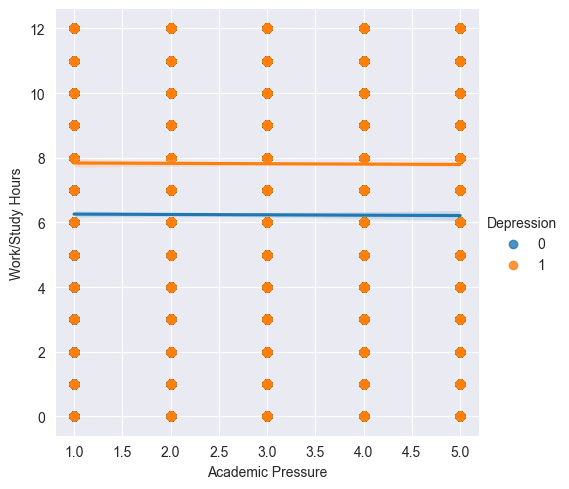

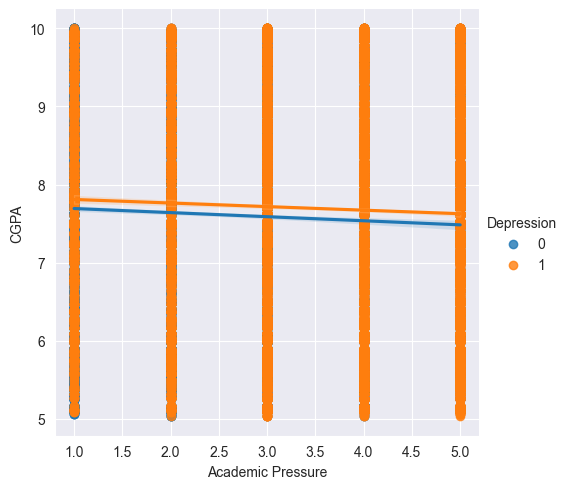

In [9]:
sns.lmplot(train, x="Academic Pressure", y="Work/Study Hours", hue="Depression")
sns.lmplot(train, x="Academic Pressure", y="CGPA", hue="Depression")

### Key Findings:
- **Academic Pressure**, **Study Satisfaction** and **Work/Study Hours** strongly correlates with depression (same with **Work Pressure** and **Job Satisfaction** for professionals)
- **CGPA** slighly correlates with depression and inversely proportional to **Academic Pressure**

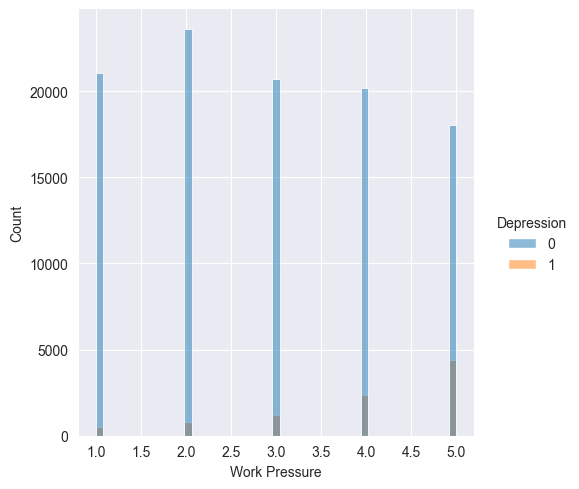

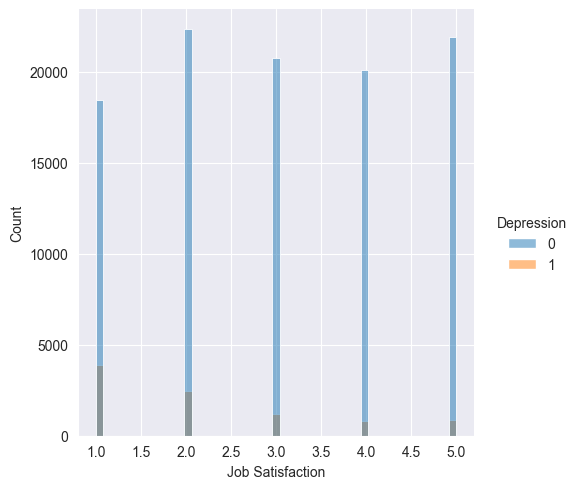

In [10]:
sns.displot(train, x="Work Pressure", hue="Depression")
sns.displot(train, x="Job Satisfaction", hue="Depression")

### Sleep Duration

In [11]:
train["Sleep Duration"].value_counts()

Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
2-3 hours                5
4-6 hours                5
6-8 hours                4
1-6 hours                4
No                       4
9-11 hours               2
10-11 hours              2
Sleep_Duration           2
Unhealthy                2
45                       2
8-9 hours                2
10-6 hours               1
9-5                      1
45-48 hours              1
3-6 hours                1
Work_Study_Hours         1
49 hours                 1
than 5 hours             1
Pune                     1
9-6 hours                1
8 hours                  1
35-36 hours              1
Indore                   1
1-3 hours                1
55-66 hours              1
Moderate                 1
40-45 hours              1
1-2 hours                1
9-5 hours                1
Name: count, 

Text(0.5, 1.0, 'Depression Rates by Sleep Duration')

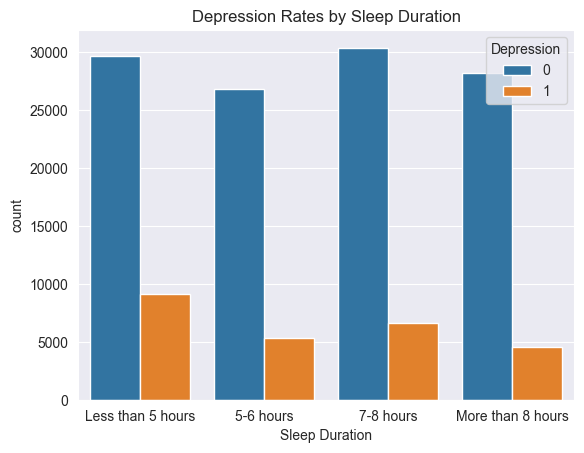

In [12]:
# Clean sleep categories (combine rare values)
sleep_categories = ["Less than 5 hours", "5-6 hours", "7-8 hours", "More than 8 hours"]
train["Sleep Duration"] = train["Sleep Duration"].where(
    train["Sleep Duration"].isin(sleep_categories), "Other"
)

sns.countplot(data=train, x="Sleep Duration", hue="Depression", order=sleep_categories)
plt.title("Depression Rates by Sleep Duration")

In [13]:
train["Dietary Habits"].value_counts()

Dietary Habits
Moderate             49705
Unhealthy            46227
Healthy              44741
Yes                      2
No                       2
More Healthy             2
No Healthy               1
Class 12                 1
Indoor                   1
Male                     1
Vegas                    1
M.Tech                   1
Less Healthy             1
1.0                      1
Electrician              1
Hormonal                 1
Mihir                    1
Less than Healthy        1
3                        1
Gender                   1
BSc                      1
Pratham                  1
2                        1
Name: count, dtype: int64

Text(0.5, 1.0, 'Depression Rates by Dietary Habit')

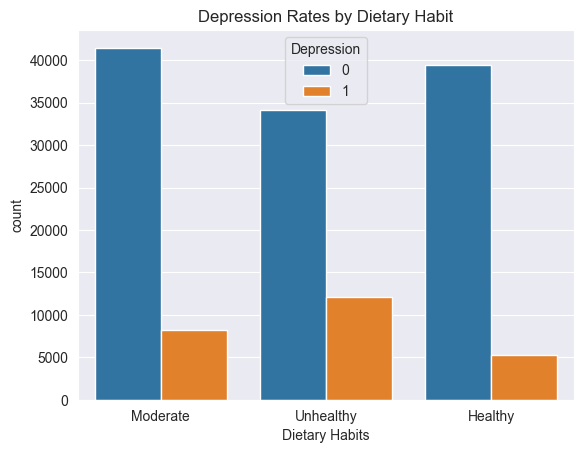

In [15]:
diet_categories = ["Moderate", "Unhealthy", "Healthy"]
train["Dietary Habits"] = train["Dietary Habits"].where(
    train["Dietary Habits"].isin(diet_categories), "Other"
)

sns.countplot(data=train, x="Dietary Habits", hue="Depression", order=diet_categories)
plt.title("Depression Rates by Dietary Habit")

### Key findings :
**Lowest Sleep Duration** and **Unhealthy Dietary Habits** have the highest depression rate 

## Conclusions:
1. **Key Factors**: Financial stress, Quality of life, and academic/work dissatisfaction  
2. **Data Quality**:  
   - Profession/student status explains most missing data patterns  
3. **Next Steps**:  
   - Creating Pressure and Satisfaction columns and dealing with categorical features